# **Deliverable 1: Radiation Physics and Image Quality**

---

## Overview

This deliverable covers foundational and advanced concepts from **Weeks 2-5** (Lectures 1-12) of the course. You will explore:
1. Radiation physics and ionizing radiation
2. X-ray production and energy scales
3. Photon-matter interactions (photoelectric, Compton, attenuation)
4. Spatial resolution and system blurring
5. Linear systems, MTF, and image sharpness
6. Noise sources, SNR, and image quality
7. Quantum noise, dose optimization, and trade-offs
8. Comprehensive design challenge for imaging protocols

You will engage with the material through a combination of conceptual questions and guided coding exercises designed to strengthen physical intuition and practical problem-solving skills. By the end of this deliverable, you will be able to interpret imaging trade-offs, analyze image quality metrics, and make informed decisions when optimizing imaging protocols for clinical applications.

---
## **<u>Part 1: Radiation Physics</u>**

### 1.1 Ionizing Radiation Classification and Energy Scales

**Key Concept:**
Radiation is classified by whether it has enough energy to knock electrons out of atoms (ionization). This happens when the photon energy exceeds the **ionization potential** of an atom (~13.6 eV for hydrogen).

**Energy Classification:**
- **Non-ionizing:** Visible light (1.6-3.1 eV), radio waves (<0.00001 eV)
  - Energy too low to ionize atoms
  - Cannot damage DNA directly
  
- **Ionizing:** X-rays (keV range), gamma rays (keV-MeV range)
  - High enough energy to remove electrons from atoms
  - Can damage living tissue and DNA
  - Used in medical imaging (controlled exposure)

**Key Equation:**
$$E = h\nu = \frac{hc}{\lambda}$$

- Where: 
    - h = 6.626×10⁻³⁴ J·s (Planck's constant)
    - c = 3×10⁸ m/s (speed of light)

### **Question 1**

**Scenario:** A patient asks why a chest X-ray is "safe" but they worry about radiation exposure.

Using the concepts above, answer:
- (a) Why is a chest X-ray classified as ionizing radiation? What does "ionizing" mean?

    Ionizing radiation is any form of radiation which has the ability (either directly or indirectly) to remove a bound electron from its shell in an atom. There are two subtypes of ionizing radiation:
    - Directly ionizing radiation, which generally consists of fast-moving charged particles (e.g. electrons) which interact with bound electrons via Coulomb forces, thus transferring some of their kinetic energy to the bound electrons. If this kinetic energy transfer is larger than the binding energy of the bound electron, then the bound electron will be ionized.
    - Indirectly ionizing radiation, which generally consists of non-charged particles (e.g. photons or neutrons) which have enough energy to free a charged particle. For instance, a photon with an energy higher than the binding energy of a bound electron could strike one such electron, freeing it via the photoelectric effect, or a neutron could strike a nucleus with enough kinetic energy to free a proton. This free charged particle can then directly ionize other charged particles.
    The ionization potential of water is 12.6 eV; i.e. a photon must have at least 12.6 eV of energy to free a bound electron from a molecule of water, indirectly ionizing it. The human body is mostly water, so it is reasonable to assume a similar ionization potential (12 - 15 eV) for the molecules of the human chest. X-rays at diagnostic energies have energies ranging from 20 to 140 keV, which is significantly greater than the ionization potential of water, so there is a very high chance of indirect ionization occuring within the human body in a tyoical chest X-ray.

- (b) A chest X-ray delivers ~0.1 mSv. A CT scan delivers ~7 mSv (70× higher). What does this mean for radiation dose to the patient?
    
    One sievert (Sv) of radiation is the SI measure of 'effective dose', or a measure of the amount of detrimental radiation applied to a given area of the body, as a factor of the actual dose applied, the biological effectiveness of the type of radiation, and the part of the body to which it is applied. Thus, more sieverts of effective dose result in higher risk of detrimental effects such as cancers or damage to DNA. Based on these provided values, we can see that a CT scan provides about 70x higher dosage of radiation compared to a chest X-ray. It should be noted that these values are still quite low; it is estimated that the average person receives an effective dose of about 3 mSv a year from natural sources; a chest X-ray is well below this value, and a CT scan is only slightly more than twice this value (i.e. the expected detrimental effects from the radiation of a CT scan are approximately equivalent to those from an average person just normally living for a little over 2 years).

### 1.2 X-ray Production

**X-ray Generation:**
X-rays are produced when high-energy electrons strike a metal target (usually tungsten).

**Two Production Mechanisms:**

1. **Bremsstrahlung (Braking Radiation):**
   - Electron decelerates near nucleus
   - Loses kinetic energy → emitted as X-ray photon
   - Produces **continuous spectrum** of energies
   - Maximum energy = tube voltage (kVp)
   - Accounts for ~80% of X-ray output

2. **Characteristic X-rays:**
   - Electron knocks out inner shell electron
   - Outer electron fills vacancy
   - Energy difference emitted as X-ray
   - Produces **discrete spectral lines** (specific energies)
   - Depends on target material (e.g., K-alpha, K-beta lines for tungsten)

**X-ray Spectrum:**
- Shape determined by tube voltage (kVp) and filtration
- Higher kVp → higher maximum energy and intensity
- Filtration removes low-energy photons (patient protection)

**Key Equation:**
$$E_{max} = eV_{peak}$$
- Where:
   - $V_{peak}$ is the peak tube voltage in kV

### **Question 2**

An X-ray tube operates at 100 kVp with a tungsten target.

- a) What is the maximum energy (in keV) of X-ray photons that can be produced?

    The maximum energy of the produced X-ray photons is: $$E_{max} = eV_{peak} = (1 eV/V)(100 kVp)= 100 keV$$.

- b) Explain the difference between bremsstrahlung and characteristic X-rays. Which one produces the continuous spectrum and which produces discrete peaks?

    Bremsstrahlung occurs when a fast-moving electron interacts via Coulomb forces with an atomic nucleus, causing the electron to lose some of its kinetic energy. This energy is (partially, as bremsstrahlung's efficiency is generally very small; the rest is lost as heat) emitted as an X-ray photon. Because the energy transfer comes from the kinetic energy of the electron, it can have any value in a continuous range, so it produces the continuous spectrum.

    Characteristic X-rays are produced when an atom has an inner shell vacancy (e.g. because a fast-moving electron has collided with an inner-shell electron, ionizing that electron). An upper-shell electron jumps down to fill this vacancy, causing (some of the time; otherwise an Auger electron may be produced instead) an X-ray photon to be emitted with an energy equalling the difference between the binding energies of the two shells. Because there are a small, finite number of shells in a given atom, and each shell has a characteristic binding energy, the resulting photon energy can only be a discrete handful of values; thus, in the spectrum, characteristic X-rays produce the discrete peaks.

- c) Why do we use filtration (typically aluminum) at the X-ray tube output? What effect does this have on the X-ray spectrum and patient dose?

    Low-energy photons are not helpful when trying to produce an image via X-ray imaging, but they can still ionize tissue, as they are still well above the ionization potential of water. Attenuating these low-energy photons while allowing higher-energy photons to pass through will thus provide the same image quality at a somewhat lower dose to the patient; this is the point of filtration at the X-ray tube output. Because beam attenuation is dependent on cross-section, which itself is dependent on both material properties (e.g. shell binding energies) and photon energy (much higher attenuation at low energies), we can choose materials to provide maximum attenuation at unwanted frequencies and minimal attenuation at the frequencies we need for imaging.


---

## **<u>Part 2: Photon Interactions</u>**

### 2.1 Interaction Types

**Key Concept:**
When X-rays pass through tissue, they interact through different mechanisms depending on photon energy and material properties.

**Main Interaction Types:**

1. **Photoelectric Effect** (low energy, high-Z materials)
   - X-ray photon absorbed completely
   - Electron kicked out of atom
   - Useful for imaging (produces signal)
   - Why: Bone (high Z) appears bright

2. **Compton Scattering** (medium-high energy)
   - Photon deflected and loses energy
   - Electron recoils
   - Scattered photons reduce image contrast (noise)
   - Why: Anti-scatter grids are used

Refer to the schematic below:

<p align="center">
  <img src="figures/scatter_effect_example.jpg" width="600">
</p>

This illustrates how Compton-scattered photons reach the detector and reduce image contrast, and how anti-scatter grids selectively absorb these scattered photons while allowing primary radiation to pass.

3. **Pair Production** (very high energy, >1.02 MeV)
   - Rare in medical imaging
   - Not important for X-rays (typically 20-150 keV)

**Attenuation:**
X-rays passing through material follow the **Beer-Lambert Law**:
$$I = I_0 e^{-\mu x}$$

- where:
    - $I$ = transmitted intensity
    - $I_0$ = incident intensity
    - $\mu$ = linear attenuation coefficient (material dependent)
    - $x$ = material thickness

### **Question 3**

Consider an X-ray imaging system operating at 80 keV.

- a) At this energy, both photoelectric absorption and Compton scattering occur. Which interaction mechanism is more likely to dominate in bone tissue versus soft tissue, and why? (Hint: Consider the atomic number dependence)

    Bone tissue contains significant proportions of calcium (Z = 20) and phosphorus (Z = 15), while the body's soft tissue is primarily carbon (Z = 6), oxygen (Z = 8), and nitrogen (Z = 7). The photoelectric effect's cross section for a given atom is proportional to the fourth power of Z, while the cross section of Compton scattering is proportional only to the first power of Z and is more dependent on electron density than on atomic number. Thus, the photoelectric effect dominates overwhelmingly in bone tissue, while the proportions are somewhat more even in soft tissue.

- b)Explain why Compton scattered photons are problematic for image quality. What specific image quality metric do they degrade?

    Compton-scattered photons which reach the detector do so at effectively random locations due to the scattering, compared to the incident radiation. Thus, when we are attempting to locate regions which absorb more electrons, the scattered photons may trigger the detector at a location where photons were in fact being absorbed. This decreases the contrast of the resulting image and makes it more difficult to tell each region apart.

- c) X-ray imaging systems use anti-scatter grids to reduce the detection of scattered photons. If a grid removes 80% of scattered photons but also blocks 20% of primary (unscattered) photons, when would you choose to use the grid versus imaging without it? Consider both image quality and patient dose.

    This grid blocks the vast majority of scattered photons, which would improve the image contrast (by darkening areas that should be dark); however, it also blocks a fairly large proportion of primary photons, which will decrease the image contrast (by darkening areas that should be bright). Overall, more scattered photons than primary photons are removed, so the contrast should improve; however, a consequence of losing the primary photons is that a higher dose must be provided to the patient to get the same effectiveness. (In fact, this higher dose must be 25% higher than the original dose to obtain the same intensity of primary photons, because 1/0.8 = 1.25.) Thus, if our concern is primarily avoiding larger doses, then the grid must not be used; but if this is a less important consideration than improving the image quality, then the grid should be used. 

- d) In CT imaging, we use higher energies (120-140 keV) compared to conventional radiography (60-80 keV). Based on the energy dependence of photoelectric and Compton interactions, how does this affect the contrast between bone and soft tissue in CT images?

    The probability of photoelectric interactions decreases significantly as photon energy increases, while the probability of Compton interactions increases to a peak and then begins to trail off. Good contrast between bone and soft tissue is seen due to photoelectric interactions, while Compton interactions provide poor contrast due to their weak Z dependance and their scattering angles; thus, we would expect to see poor contrast between bone and soft tissue in CT images.

### 2.2 Beer-Lambert Law & Attenuation

**Attenuation** describes how X-ray intensity decreases as it passes through material.

**Beer-Lambert Law:**
$$I = I_0 e^{-\mu x}$$

- Where:
    - $I$ = transmitted intensity
    - $I_0$ = incident intensity  
    - $\mu$ = linear attenuation coefficient (cm⁻¹) - material dependent
    - $x$ = material thickness (cm)

**Half-Value Layer (HVL):**
- Thickness of material that reduces intensity to 50%
- Related to attenuation coefficient: $HVL = \frac{\ln(2)}{\mu} = \frac{0.693}{\mu}$
- Lower HVL = more attenuation (denser material or lower energy)

**Key Insight:**
- Bone has higher μ than soft tissue → more attenuation → appears bright
- Different energies attenuate differently (energy dependence)
- HVL is a practical measure used in X-ray quality control

### **Question 4**

A 60 keV X-ray beam passes through soft tissue with linear attenuation coefficient μ = 0.2 cm⁻¹.

- a) If the incident intensity is $I_0 = 10,000$ photons, what is the transmitted intensity after passing through 5 cm of tissue? Use the Beer-Lambert law.

    Using the Beer-Lambert law:
    $$I = I_0 e^{-\mu x} = 10000 e^{- (0.2 \mathrm{cm}^{-1} \times 5 \mathrm{cm})} = 10000 e^{-1} \approx 3679\:\mathrm{  photons.}$$

- b) Calculate the Half-Value Layer (HVL) for this tissue at 60 keV.

    The Half-Value Layer thickness for this tissue is found when:
    $$\frac{I}{I_o}=2$$
    Thus:
    $$\mathrm{HVL}=\frac{\ln(2)}{\mu}=\frac{\ln(2)}{0.2 \mathrm{cm}^{-1}} \approx 3.46\:\mathrm{  cm}$$

- c) If you increase the X-ray energy from 60 keV to 120 keV, the attenuation coefficient decreases to μ = 0.15 cm⁻¹. What happens to the transmitted intensity through the same 5 cm of tissue? Calculate the new transmitted intensity and explain why higher energy X-rays penetrate better.

    Using the Beer-Lambert law:
    $$I = I_0 e^{-\mu x} = 10000 e^{- (0.15 \mathrm{cm}^{-1} \times 5 \mathrm{cm})} = 10000 e^{-1} \approx 4724\:\mathrm{  photons.}$$

    As can be seen, these higher-energy photons have been more successful at passing through 5 cm of tissue because a lower attenuation coefficient is associated with them. The reason for this is that the attenuation coefficient is proportional to the sum of the cross-sections of each of the possible absorption or scattering effects that can occur at a given energy; at these higher energies, the total cross section is smaller because of the steep decline in interactions via the photoelectric effect. Though other effects have increased cross-sections at this energy, they are not enough to counteract that decline, and so the attenuation coefficient still decreases overall.

---

## **<u>Part 3: Spatial Resolution</u>**

### 3.1 Point Spread Function (PSF) and System Blurring

**Key Concept:**

Real imaging systems are **imperfect**. A point source (infinitely small object) doesn't appear as a point in the image—it appears as a **blurred blob**. This blurring limits how small an object you can see.

**Point Spread Function (PSF):**
- **PSF** = How much a point source gets blurred by the imaging system
- **Shape:** Usually Gaussian-like (bell curve)
- **Width:** Characterized by **FWHM** (Full Width at Half Maximum)
  - Smaller FWHM = sharper system (better resolution)
  - Larger FWHM = blurrier system (worse resolution)


**Resolution Rule of Thumb:** You can distinguish two objects only if they're separated by at least the **FWHM of the PSF**. Anything closer just blurs together.

**Image Formation:**

$$\text{Blurred Image} = \text{Sharp Object} \otimes \text{PSF}$$

  - The $\otimes$ symbol means "convolved with"—every sharp point gets replaced by a blurred copy (PSF shape).

**Real Example - Chest X-ray:**
- System resolution: ~0.2 mm FWHM
- Lung nodule: 3-4 mm → **Visible** (15-20× larger than PSF)
- Micro-calcification: 1-3 mm → **Borderline** (5-15× larger)
- Small vessel: 0.5 mm → **Invisible** (blurs away)

### **Question 5**

You're designing an X-ray detector system for mammography, where high resolution is critical to detect small microcalcifications (~100 μm).

- a) If your current detector has a PSF with FWHM = 200 μm, can you reliably detect 100 μm objects? Explain your reasoning using the relationship between FWHM and object size.

   No, we cannot reliably detect 100 μm objects with this detector, because they are smaller than the FWHM of the system. Based on the rule of thumb, the distance between the two edges of the object must be at least equal to the FWHM for it to be detected; thus, two microcalcifications could easily be detected as a single one, or one might be missed because the system resolution is large enough that the PSF would blur it too much.

- b) You have two detector options:
   - **Detector A**: 50 μm pixels, FWHM = 100 μm, readout time = 5 seconds
   - **Detector B**: 100 μm pixels, FWHM = 200 μm, readout time = 1 second
   
   Which detector would you choose for mammography and why? Consider resolution requirements, patient motion, and clinical workflow.

   I would choose Detector A because of its better resolution (smaller FWHM means that the PSF is less blurred). We need to detect objects of 100 μm, so we need an FWHM that is at most 100 μm (based on the rule of thumb) and a pixel size of at most 50 μm (fom the Shannon sampling theorem; pixel size must be at most half of the size of objects to detect). There are two trade-offs, however; the patient must hold still for 5 seconds rather than one second (which is feasible, but will likely introduce some anatomical noise in the image, requiring potentially higher doses or contrast stretching), and this also means that fewer patients can be processed in a given period of time (but other steps in the clinical workflow introduce much more delay than this).

- c) In PET imaging, using smaller detector crystals improves spatial resolution but also increases system cost and complexity. If you could reduce FWHM from 5 mm to 2.5 mm (2× improvement) at a 3× increase in cost, what clinical applications would justify this investment? Name at least two specific imaging tasks where the improved resolution would significantly impact diagnosis.

   The investment in improving this system's FWHM would be justified if there were clinically important objects that could be detected using the higher-resolution system, but not using the lower-resolution system. As an example, the 5-mm FWHM system would be completely unable to detect lung nodules of 3-4mm, as well as calcifications of less than 5mm in size; the 2.5-mm FWHM system would easily detect the lung nodules and additional calficiations (though still not all possible micro-calcifications). This could impact the diagnosis of breast cancer from a mammography.

### 3.2 Linear Systems Theory & MTF

**Linear Systems Theory:**
Medical imaging systems can be modeled as linear, shift-invariant systems.

**Key Properties:**
1. **Linearity:** If input doubles, output doubles
2. **Shift Invariance:** System response doesn't depend on position
3. **Convolution:** Image formation is described by convolution with PSF
   $$\text{Image} = \text{Object} \otimes \text{PSF}$$

**Modulation Transfer Function (MTF):**
- MTF is the **Fourier transform of the PSF**
- Measures how well the system reproduces different spatial frequencies
- MTF ranges from 0 (no reproduction) to 1 (perfect reproduction)
- **Spatial frequency** measured in cycles/mm or line pairs/mm

**Interpreting MTF:**
- MTF = 1.0 at low frequencies → large objects reproduced perfectly
- MTF decreases at high frequencies → fine details are blurred
- **MTF at 50%** (where MTF = 0.5) is often used as resolution metric
- Related to FWHM: Better resolution → higher MTF at high frequencies

**Example:**
- System A: MTF = 0.5 at 5 cycles/mm → can resolve 0.1 mm details
- System B: MTF = 0.5 at 10 cycles/mm → better, can resolve 0.05 mm details

### **Question 6**

You are comparing two X-ray detector systems:

| System | MTF at 2 cycles/mm | MTF at 5 cycles/mm | MTF at 10 cycles/mm |
|--------|-------------------|-------------------|---------------------|
| System A | 0.95 | 0.70 | 0.30 |
| System B | 0.90 | 0.50 | 0.10 |

- a) Which system has better spatial resolution? Explain your reasoning using the MTF values.

    System A has the better spatial resolution.
    System B reaches MTF = 0.5 at 5 cycles/mm, which means it can resolve details as fine as 0.1mm. 
    We don't know System A's 50% MTF value, but we know that it is somewhere between 5 cycles/mm and 10 cycles/mm (because the MTF monotonically decreases with frequency), and thus must have better spatial resolution than 0.1mm. 

- b) For detecting a 1 mm lesion (which contains frequencies around 1-2 cycles/mm), which system would be more suitable?

    System A would be slightly more suitable, because its MTF is slightly higher at 2 cycles/mm, but in practice either system would likely be fine as other parts of the system cascade will be the limiting factors.

- c) Explain the relationship between MTF and PSF. How are they related mathematically, and what does each tell us about the imaging system?

    The MTF is the Fourier transform of the PSF, meaning that while the PSF gives the point response in the space domain, the MTF gives the response of the system in the spatial frequency domain. The PSF tells us the nature and shape of the blurring experienced by a single point in the real system when converted into an image, while the MTF identifies how well the system can resolve various spatial frequencies (useful for identifying the system's resolution)


---

## **<u>Part 4: Noise & Image Quality</u>**

### 4.1 Understanding Image Noise

**Quantum (Poisson) Noise** is the primary noise source in X-ray and nuclear imaging:

- Arises from the random nature of photon emission and detection
- Follows **Poisson statistics**: if we detect N photons on average, the noise (standard deviation) is $\sigma = \sqrt{N}$
- **Signal-to-Noise Ratio (SNR)**: $SNR = \frac{N}{\sigma} = \frac{N}{\sqrt{N}} = \sqrt{N}$

**Key insights:**
- SNR increases with the square root of photon count
- To double SNR, you need 4× more photons (4× more dose)
- **Rose Criterion**: Objects are detectable when SNR ≥ 5

**Noise reduction strategies:**
1. Increase photon count (higher dose)
2. Spatial averaging (smoothing filters)
3. Temporal averaging (multiple acquisitions)

Below is an example of a noisy MRI image:

<p align="center">
  <img src="figures/MRI_Highnoise.jpg" width="400">
</p>

### **Coding Exercise 1**

In this exercise, you will implement and compare two different denoising filters:
1. **Gaussian filter** - Simple smoothing
2. **Median filter** - Edge-preserving, good for impulse noise

Your task is to:
- Implement both filters with appropriate parameters
- Calculate the Peak Signal-to-Noise Ratio (PSNR) for each filtered image
- **Choose the best filter** for this medical image and justify your choice

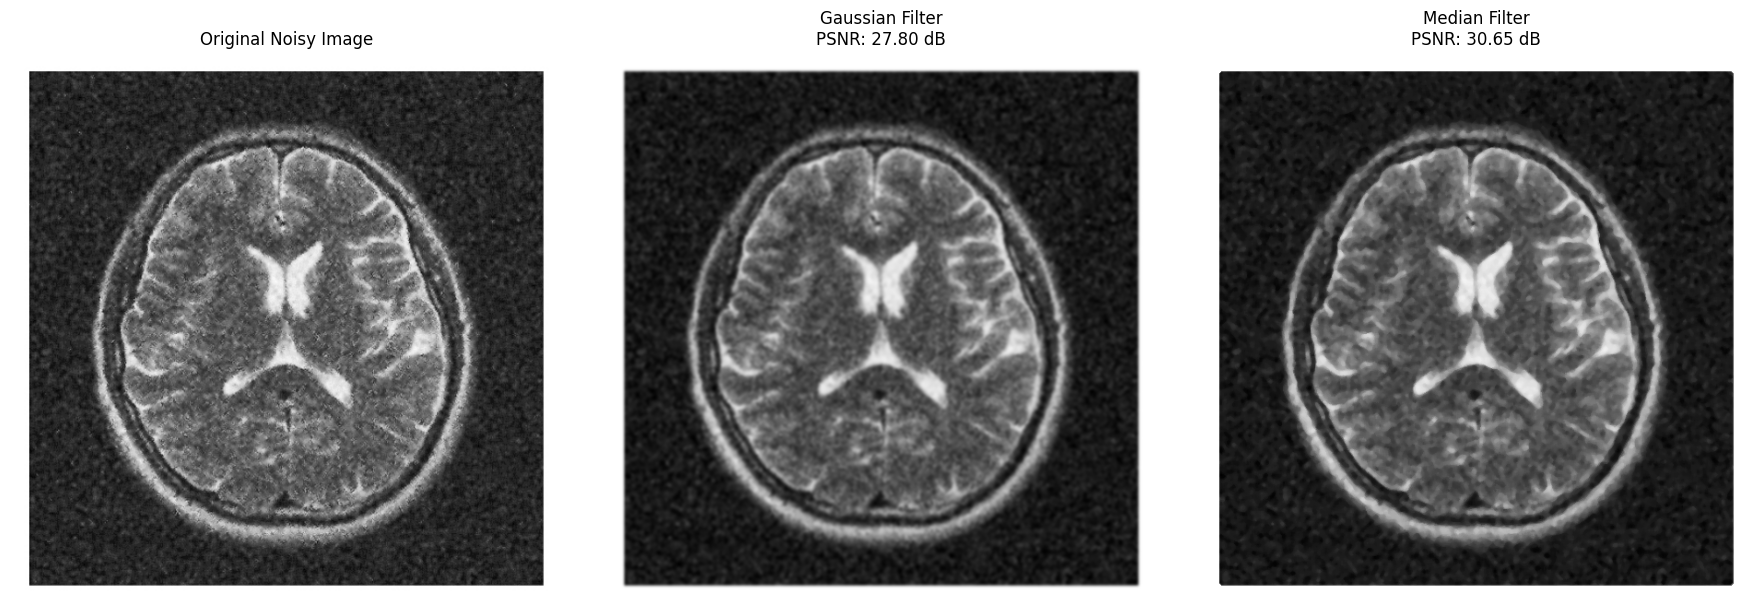

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter, median_filter

# Load the noisy MRI image
img = Image.open('figures/MRI_Highnoise.jpg').convert('L')  # Convert to grayscale
img_array = np.array(img, dtype=float)

# Implement both different filters
    # Hint: Try different parameter values to optimize each filter

sigma = 1.4                  # TODO: choose sigma
kernel_size = 5            # TODO: choose median size (odd integer)

# 1. Gaussian filter (adjust sigma)
img_gaussian = gaussian_filter(img_array, sigma=sigma)  # TODO: Optimize sigma

# 2. Median filter (adjust size)
img_median = median_filter(img_array, size=kernel_size)  # TODO: Optimize size

# Calculate PSNR for each filtered image
def calculate_psnr(original, filtered):
    """
    Calculate Peak Signal-to-Noise Ratio
    PSNR = 10 * log10(MAX^2 / MSE)
    where MSE is the mean squared error
    """
    # Implement PSNR calculation
        # Hint: For images, MAX is typically 255 for 8-bit images
    mse = np.mean(np.square(filtered - original))        # TODO
    max_pixel = np.max([np.max(original), np.max(filtered)])  # TODO
    psnr = 10 * np.log10(max_pixel**2 / mse)      # TODO
    return psnr

# Calculate PSNR for a reference (you'll need to think about what reference to use)
# For demonstration, we'll calculate PSNR relative to the original noisy image
# In practice, you'd want a ground truth clean image

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img_array, cmap='gray')
axes[0].set_title('Original Noisy Image')
axes[0].axis('off')

axes[1].imshow(img_gaussian, cmap='gray')
axes[1].set_title(f'Gaussian Filter\nPSNR: {calculate_psnr(img_array, img_gaussian):.2f} dB')
axes[1].axis('off')

axes[2].imshow(img_median, cmap='gray')
axes[2].set_title(f'Median Filter\nPSNR: {calculate_psnr(img_array, img_median):.2f} dB')
axes[2].axis('off')

plt.tight_layout()
plt.show()

Your Analysis:

- a) Which filter did you choose and why?

    I chose the median filter because it was much more effective at reducing the salt-and-pepper noise seen in the image. This makes sense; the Gaussian filter calculates a weighted average of each pixel's neighbourhood, while the median filter chooses the median pixel in the neightbourhood; thus, the median filter actively ignores random noise while the Gaussian filter is still affected by it. In addition, the median filter blurs the signal less (i.e. keeps sharp edges better) than the Gaussian filter does, because signal regions of similar values along edges of different values are preserved better by the median filter.

### 4.2 Detective Quantum Efficiency (DQE)

**DQE** measures how efficiently an imaging system uses the incoming radiation to produce image information.

**Definition:**
$$DQE = \frac{SNR_{out}^2}{SNR_{in}^2}$$

Where:
- $SNR_{out}$ = signal-to-noise ratio in the output image
- $SNR_{in}$ = signal-to-noise ratio in the input radiation

**Key Concepts:**
- DQE ranges from 0 to 1 (or 0% to 100%)
- **Perfect detector:** DQE = 1 (no noise added by detector)
- **Real detectors:** DQE < 1 (detector adds noise)
- Higher DQE = better detector (more efficient use of radiation)

**Practical Implications:**
- High DQE detector → need less radiation dose for same image quality
- DQE depends on spatial frequency (usually decreases at high frequencies)
- DQE depends on exposure level (often highest at moderate exposures)

**Example:**
- Film/screen: DQE ≈ 0.3-0.4 (30-40%)
- Digital radiography (DR): DQE ≈ 0.6-0.7 (60-70%)
- DR systems allow lower dose for same image quality

### **Question 7**

Two X-ray detector systems are being compared:

- **System A (Film/Screen):** DQE = 0.35, cost = $10,000
- **System B (Digital DR):** DQE = 0.70, cost = $50,000

Both systems receive the same input radiation with $SNR_{in} = 100$.

- a) Calculate the output SNR for each system.

    $DQE = \frac{SNR_{out}^2}{SNR_{in}^2}$, thus $SNR_{out} = \sqrt{{SNR_{in}^2} \times DQE}$

    The output SNR for System A is: 
    $SNR_{out} = \sqrt{100^2 \times 0.35} = 59.2$

    The output SNR for System B is: 
    $SNR_{out} = \sqrt{100^2 \times 0.70} = 83.7$

- b) If you want to achieve the same output SNR with System A as System B naturally produces, by what factor would you need to increase the radiation dose to System A?

    To obtain an output SNR of 83.7, the input SNR for System A needs to be: 
    $$SNR_{in} = \sqrt{\frac{SNR_{out}^2}{DQE}} = \sqrt{\frac{83.7^2}{0.35}} = 141$$

    Because $SNR_{in} = \sqrt{N}$, this means we need a photon count (dose) of $SNR_{in}^2 = 141^2 = 20000$. 

    In comparison, for $SNR_{in} = 100$, a photon count of $SNR_{in}^2 = 100^2 = 10000$ is required. 

    Thus, it is clear that to improve the output SNR of System A to the same level as that of System B, the dose must be *doubled*.

- c) In a high-volume clinical setting performing 100 chest X-rays per day, discuss whether the higher cost of System B is justified. Consider patient dose, image quality, and long-term patient safety.

    Per the Rose criterion, the output SNR of the diagnostic image must be equal to or better than approximately 5 in order to be useful diagnostically. The ALARA principle holds that for the sake of long-term patient safety, we should use the minimum possible dose that provides acceptable diagnostic quality; thus, we should choose a system that allows us to achieve an output SNR of 5 with a lower dose. 

    The dose required to achieve an output SNR of 5 is calculated: 
    $$N = SNR_{in}^2 = \frac{SNR_{out}^2}{DQE} = \frac{5^2}{DQE}= \frac{25}{DQE}$$

    The dose required for System B to achieve an acceptable output SNR is thus $\frac{25}{0.7} = 35.7$, while the dose required for System A to achieve an acceptable output SNR is $\frac{25}{0.35} = 71.4$, which is twice that of System B.

    We can see, then, that to achieve an acceptable output SNR, System B requires half the dose at five times the cost. This disparity could potentially make it not worth the cost, provided that the dose required for System A is considered to be at an acceptable level. Otherwise, if the dose required for System A is unacceptable but half that dose is acceptable, then System B must be used.

---

## **<u>Part 5: Quantum Noise & Dose Analysis</u>**

### **Coding Exercise 2**

In this exercise, simulate the effect of photon counting statistics on image quality. You will:
- Generate a simple "phantom" image
- Add Poisson noise at different dose levels
- Calculate SNR as a function of photon count
- Verify the theoretical relationship: $SNR = \sqrt{N}$

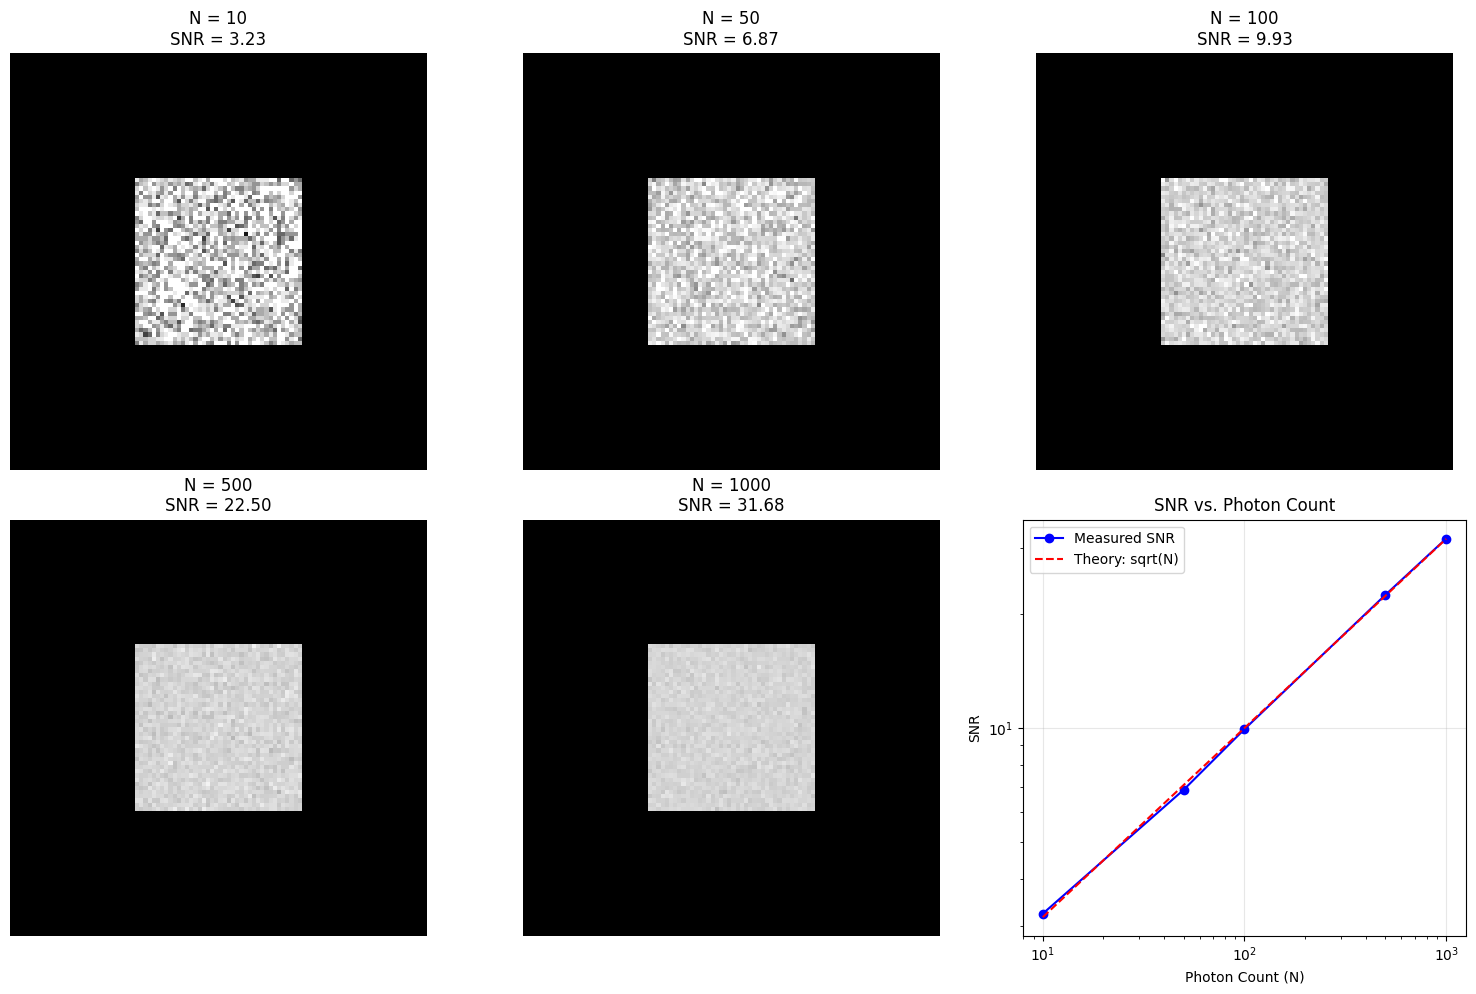


Dose levels and corresponding SNR:
N =   10 photons: SNR = 3.23 (Theory: 3.16, Error: 2.14%)
N =   50 photons: SNR = 6.87 (Theory: 7.07, Error: -2.85%)
N =  100 photons: SNR = 9.93 (Theory: 10.00, Error: -0.71%)
N =  500 photons: SNR = 22.50 (Theory: 22.36, Error: 0.61%)
N = 1000 photons: SNR = 31.68 (Theory: 31.62, Error: 0.18%)


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple phantom (uniform square in background)
phantom = np.zeros((100, 100))
phantom[30:70, 30:70] = 1.0  # Square with intensity 1.0

# Define different photon dose levels (mean photons per pixel)
dose_levels = [10, 50, 100, 500, 1000]
snr_measured = []

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, N_photons in enumerate(dose_levels):
    # Generate Poisson noise
        # Hint: Scale phantom by N_photons, apply Poisson noise, then normalize back
    noisy_phantom = np.random.poisson(N_photons * phantom) / N_photons # TODO
    
    # Calculate SNR in the central square region
    signal_region = noisy_phantom[30:70, 30:70]
    background_region = noisy_phantom[0:20, 0:20]
    
    signal_mean = np.mean(signal_region) # TODO
    background_mean =  np.mean(background_region)        # TODO
    noise_std = np.std(signal_region)        # TODO
    
    snr = signal_mean / noise_std       # TODO
    snr_measured.append(snr)
    
    # Display noisy phantom
    axes[idx].imshow(noisy_phantom, cmap='gray', vmin=0, vmax=1.2)
    axes[idx].set_title(f'N = {N_photons}\nSNR = {snr:.2f}')
    axes[idx].axis('off')

# Plot SNR vs. N (log-log scale)
axes[5].loglog(dose_levels, snr_measured, 'bo-', label='Measured SNR')

# Plot theoretical SNR = sqrt(N) for comparison
theoretical_snr = np.sqrt(dose_levels)        # TODO
axes[5].loglog(dose_levels, theoretical_snr, 'r--', label='Theory: sqrt(N)')
axes[5].set_xlabel('Photon Count (N)')
axes[5].set_ylabel('SNR')
axes[5].set_title('SNR vs. Photon Count')
axes[5].legend()
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDose levels and corresponding SNR:")
for N, snr in zip(dose_levels, snr_measured):
    print(f"N = {N:4d} photons: SNR = {snr:.2f} (Theory: {np.sqrt(N):.2f}, Error: {round(100 * (snr - np.sqrt(N)) / np.sqrt(N), 2)}%)")
        # I modified this line to add the error percentages.

Your Analysis:

- a) Do your measurements agree with the theoretical prediction? If there are differences, what might explain them?

    These measurements are extremely close to the theoretical prediction! There are some small differences, but this is to be expected (with roughly ±3% error in the worst case) as this is a random process. This being the result of randomess is evidenced by the fact that the error percentages change significantly every time the code is re-run.

### **Coding Exercise 3**

You're tasked with determining the minimum radiation dose needed for three different clinical scenarios:

1. **Routine chest X-ray** - Need to detect 5 mm nodules (require SNR ≥ 5)
2. **Diagnostic CT** - Need to detect 2 mm lesions (require SNR ≥ 8)
3. **High-risk screening** - Need to detect 1 mm microcalcifications (require SNR ≥ 10)

Given that your baseline protocol delivers N₀ = 1000 photons and achieves SNR₀ = 10 for a 5 mm object:

**Calculate:**
- a) Required photon count for each scenario

- b) Relative dose compared to baseline

In [ ]:
# Baseline values
N0 = 1000  # photons
SNR0 = 10  # for 5 mm object

# Calculate required photon counts for each scenario
    # Hint: Use SNR = sqrt(N) and scale appropriately

scenarios = [
    {'name': 'Routine Chest X-ray', 'size_mm': 5, 'required_snr': 5},
    {'name': 'Diagnostic CT', 'size_mm': 2, 'required_snr': 8},
    {'name': 'High-risk Screening', 'size_mm': 1, 'required_snr': 10}
]

print("Dose Optimization Results:")
print("=" * 70)

for scenario in scenarios:
    # Calculate required N and relative dose
    # Consider both SNR requirements and object size
    
    required_N = scenario['required_snr']**2  * (2 * scenario['size_mm'])    # TODO
        # scaling factor from Nyquist rate (SNR^2 photons per pixel, size*2 pixels for the object)
    relative_dose =  required_N / N0 # TODO
    
    print(f"\n{scenario['name']}:")
    print(f"  Object size: {scenario['size_mm']} mm")
    print(f"  Required SNR: {scenario['required_snr']}")
    print(f"  Required photons: {required_N:.0f}")
    print(f"  Relative dose: {relative_dose:.2f}x baseline")

Dose Optimization Results:

Routine Chest X-ray:
  Object size: 5 mm
  Required SNR: 5
  Required photons: 250
  Relative dose: 0.25x baseline

Diagnostic CT:
  Object size: 2 mm
  Required SNR: 8
  Required photons: 256
  Relative dose: 0.26x baseline

High-risk Screening:
  Object size: 1 mm
  Required SNR: 10
  Required photons: 200
  Relative dose: 0.20x baseline


### **Coding Exercise 4**

Create a 2D analysis showing how image quality metrics vary with both radiation dose and detector pixel size.

You will create a heatmap showing the "detectability index" (combining SNR and resolution) as a function of:
- X-axis: Radiation dose (relative to baseline)
- Y-axis: Detector pixel size

This helps visualize the complex trade-offs in imaging system design.

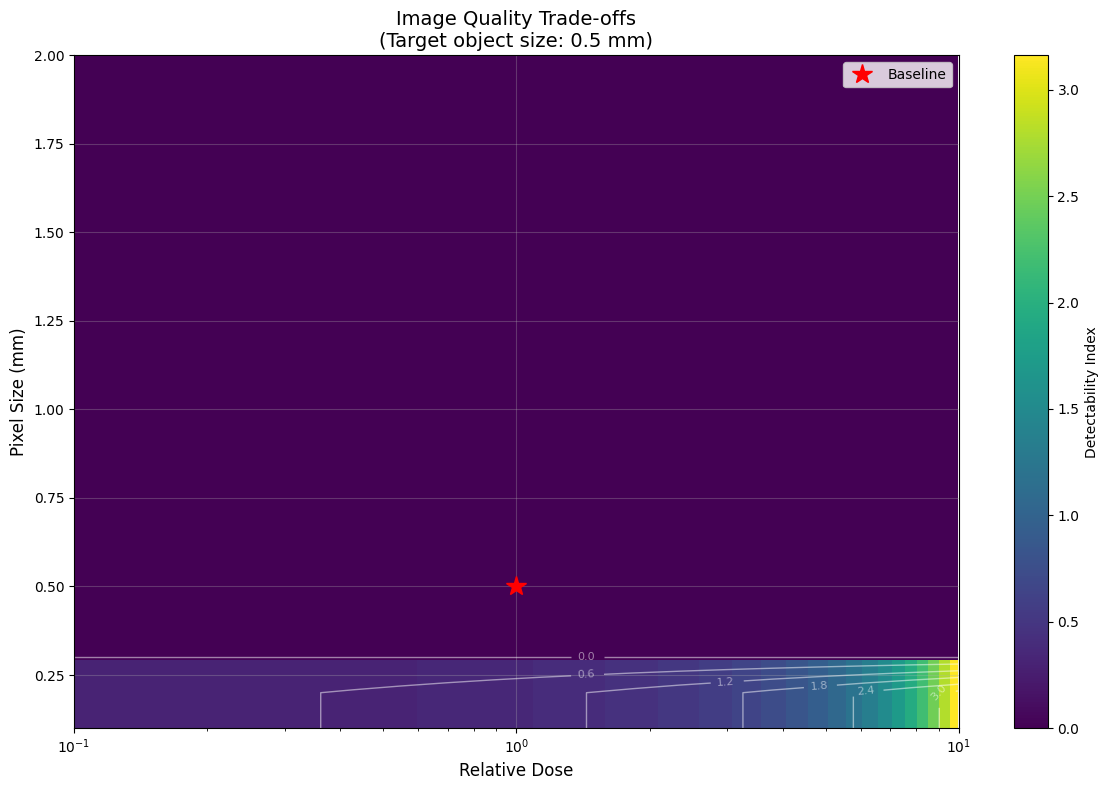

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameter ranges
dose_range = np.logspace(-1, 1, 20)  # 0.1x to 10x baseline dose
pixel_size_range = np.linspace(0.1, 2.0, 20)  # 0.1 to 2.0 mm pixels

# Target object size (mm)
target_size = 0.5  # mm

# Calculate detectability index for each combination
# Detectability ∝ SNR × (resolution_factor)
# where resolution_factor decreases as pixel_size approaches target_size

detectability = np.zeros([pixel_size_range.size, dose_range.size]) #None        # TODO

for i, pixel_size in enumerate(pixel_size_range):
    for j, dose in enumerate(dose_range):
        # Calculate detectability
        # SNR component from dose
        snr_component = np.sqrt(dose) #None        # TODO
        
        # Resolution component (decreases as pixel size increases)
        # Simple model: can't detect objects smaller than ~2× pixel size
        if pixel_size < target_size / 2:
            resolution_component = 1.0
        else:
            resolution_component = 0        # TODO
        
        detectability[i, j] = snr_component * resolution_component

# Create heatmap
plt.figure(figsize=(12, 8))
plt.imshow(detectability, aspect='auto', origin='lower', cmap='viridis',
           extent=[dose_range[0], dose_range[-1], pixel_size_range[0], pixel_size_range[-1]])
plt.colorbar(label='Detectability Index')
plt.xlabel('Relative Dose', fontsize=12)
plt.ylabel('Pixel Size (mm)', fontsize=12)
plt.title(f'Image Quality Trade-offs\n(Target object size: {target_size} mm)', fontsize=14)
plt.xscale('log')

# Add contour lines
contours = plt.contour(dose_range, pixel_size_range, detectability, 
                       levels=5, colors='white', alpha=0.5, linewidths=1)
plt.clabel(contours, inline=True, fontsize=8)

# Mark some interesting operating points
plt.plot([1.0], [0.5], 'r*', markersize=15, label='Baseline')
plt.legend(fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Your Analysis:

Based on the heatmap:

- a) What's the optimal operating point for detecting 0.5 mm objects?
    
    The optimal operating point (i.e. the one that maximizes detectability) is maximal dose at minimal pixel size. 

- b) If you had to reduce dose by 50%, how should you adjust pixel size to maintain detectability?
    
    If we had to reduce the dose by 50%, we would need to increase the pixel size by 50% in order to restore the same number of photons per pixel and thus keep the SNR at the same level, assuming that the pixel size is still above the Nyquist frequency. 

- c) What does this tell you about the practical limits of low-dose imaging?
    
    Increasing the pixel size requires that it still be as small as half the object size or smaller to avoid violating the Shannon sampling theorem and thus being unable to detect the object at any dose.

---

## **<u>Part 6: Comprehensive Design Challenge</u>**

You are designing an imaging protocol for lung cancer screening. The goal is to detect 3 mm nodules in the lung parenchyma.

**System constraints:**
- Maximum allowable dose: 3 mSv (effective dose)
- Available detector pixel sizes: 0.5 mm, 1.0 mm, 1.5 mm
- Required detection SNR: 6 (based on Rose criterion with safety factor)

### **Question 8**

- a) Choose a detector pixel size and justify your choice based on the spatial resolution requirements for detecting 3 mm nodules.

    From the Shannon sampling theorem, we require a pixel size of at maximum 3/2 = 1.5 mm in order to detect spatial frequencies of 3mm. All three of the detector pixel sizes are within this range.

- b) Calculate the minimum photon count needed to achieve SNR = 6, assuming baseline noise characteristics.

    The minimum photon count to achieve SNR = 6 is $6^2 = 36$ photons.

- c) If Compton scatter contributes 40% of detected photons, how does this affect your SNR calculation? Would you use an anti-scatter grid?

    SNR is affected by Weber contrast ($SNR = C\sqrt{\phi A}$), which itself is affected by scatter ($C = \frac{C_p}{1 + SPR}$) If the scatter-to-primary ratio is 0.4, $C = \frac{C_p}{1.4}$ and thus $SNR = \frac{C_p}{1.4}\sqrt{\phi A}$. We would therefore need to increase the total number of photons $\phi A$ by $1.4^2 = 1.96$ if we didn't use a scatter grid, which would produce a required photon count of $36*1.4^2 = 71$ photons to keep the same SNR. Since this is nearly double the photon count, an anti-scatter grid would be very helpful in reducing the dosage needed to achieve the required SNR.

- d) Estimate whether your protocol meets the 3 mSv dose constraint. If not, what compromises would you make and why?

---
## **<u>Submission Requirements</u>**

**You must submit TWO files to D2L:**

1. **Jupyter Notebook** (`.ipynb`): Your completed notebook with all code, outputs, and written analysis. All cells must be executed in order.

2. **PDF Export** (`.pdf`): Export your notebook to PDF (File → Export as PDF, or print to PDF). Verify all figures and equations render correctly.

**Important:** All answers must be completed directly in this Jupyter notebook.

**File naming convention:** `LastName_FirstName_Deliverable1.ipynb` and `.pdf`

**Due:** Monday, February 9, 2026 at 11:59 PM

---

## Submission Summary

| Section | Questions/Analysis Due |
|---------|------------------------|
| **Part 1: Radiation Physics** | Q1 (a,b), Q2 (a,b,c) |
| **Part 2: Photon Interactions** | Q3 (a,b,c,d), Q4 (a,b,c) |
| **Part 3: Spatial Resolution** | Q5 (a,b,c), Q6 (a,b,c) |
| **Part 4: Noise & Image Quality** | Coding Exercise 1 + Analysis, Q7 (a,b,c) |
| **Part 5: Quantum Noise & Dose Analysis** | Coding Exercise 2 + Analysis, Coding Exercise 3, Coding Exercise 4 + Analysis |
| **Part 6: Comprehensive Design Challenge** | Q8 (a,b,c,d) |